In [1]:
from math import sin, cos, radians, sqrt, log, tan
import numpy as np
import turtle
from PIL import Image
from random import choice

In [2]:
text1 = "Компьютер не отвечает. Я еще несколько раз поднимаю руки, шевелю пальцами ног. Определенно намечается прогресс. И вот я уже раскачиваю стопы вперед-назад. Получается! Сгибаю колени. Ноги у меня тоже вполне спортивные. Конечно, не такие перекачанные, как у бодибилдеров, но явно слишком крепкие для человека на грани смерти. Впрочем, я не знаю, какими они должны быть в идеале. Уперев ладони в кровать, отталкиваюсь. Корпус приподнимается. Я практически сажусь! Это стоит мне неимоверных усилий, но я не сдаюсь. От моих движений кровать слегка покачивается. Это, безусловно, не простая кровать. Приподняв голову чуть повыше, замечаю, что в изголовье и изножье овальной кровати вмонтированы мощные стенные кронштейны. То есть это некое подобие жесткого гамака. Странно… Вскоре я сижу на шланге, который воткнут в мой зад. Ощущение не самое приятное, но как оно вообще может быть приятным, если у вас там трубка? Теперь мне гораздо лучше видно все вокруг. Это не обычная палата в больнице. Стены из пластика, а сама комната круглая. Из светодиодных ламп, встроенных в потолок, льются ослепительно-белые лучи."

In [3]:
text2 = "Да что ж такое? Хотел бы я выяснить, но возможности мои весьма ограничены. Я ничего не вижу."

# Перемешивание текста

## Разбиение строки на заданное количество частей

In [4]:
def split_string(initial_data: str, power: int) -> list:
    """
    Функция разбиения строки на power частей
    :param initial_data: начальная строка
    :param power: параметр power отвечает за количество частей разбиения
    :return: list, список частей исзодного текста
    """
    res = []
    for i in range(1, power + 1):
        # Если итерация последняя - надо добавить оставшийся кусок текста
        if i == power:
            res.append(initial_data[(i-1)*(len(initial_data) // power):])
        # Добавление соответсвующего куска текста в ином случае
        else:
            (res.append(initial_data[
                        (i-1)*(len(initial_data) // power):
                       i*(len(initial_data) // power)]
                       ))
    for i in range(power - len(res)):
        res.append("")
    return res

In [5]:
string_to_split = "Привет мир!"

In [6]:
for i in range(len("Привет мир!")):
    print(f"{i}: {split_string(string_to_split, i)}")

0: []
1: ['Привет мир!']
2: ['Приве', 'т мир!']
3: ['При', 'вет', ' мир!']
4: ['Пр', 'ив', 'ет', ' мир!']
5: ['Пр', 'ив', 'ет', ' м', 'ир!']
6: ['П', 'р', 'и', 'в', 'е', 'т мир!']
7: ['П', 'р', 'и', 'в', 'е', 'т', ' мир!']
8: ['П', 'р', 'и', 'в', 'е', 'т', ' ', 'мир!']
9: ['П', 'р', 'и', 'в', 'е', 'т', ' ', 'м', 'ир!']
10: ['П', 'р', 'и', 'в', 'е', 'т', ' ', 'м', 'и', 'р!']


## Перемешка кусков внутри изначальной строки

In [7]:
def shuffling(initial_data: str, power: int) -> str:
    if power <= 1 or len(initial_data) < power:
        return initial_data
    #Пример ключа (перемешивает изначальные значения в обратном порядке)
    key = [i for i in range(power)][::-1]
    splitted = split_string(initial_data, power)
    res = []
    
    for i in key:
        res.append(splitted[i])

    return "".join(res)

## Итерационный алгоритм перемешки текста!

In [8]:
def full_shuffle(initial_data: str, start_power: int) -> str:
    power = start_power
    while len(initial_data) > power:
        initial_data = shuffling(initial_data, power)
        power *= start_power
    return initial_data

## Алгоритма перемешки на разных текстах

In [9]:
print(len(text1))

1105


In [10]:
%timeit full_shuffle(text1, 4)

259 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
decoded_text1 = full_shuffle(text1, 4)
decoded_text1

'нае обто нг. Этноеприямое е саообнно вак оно кас,  у веслиым, иятнь пр бытожетще мчыв е ондиесв ков м ург ензарол одашчурт макбуеТ ?ьрепурк яалгзИ . вс  ,атас ак аманмоС атынет зи салпакитаталб в ньло.еци-оньылебул е яичьл пястюлсо типееолехыннп в лотои,коындоал х ,пмртсв увоьтучвоп отеы.ьтдирП ндопг вян лорп еатсорк я аво,отЭзеб олсу,онвтномвори ынаяст.лав.йоньорк итаволв  еьвзи иьжонмо еюачетч , в оогзи огоамагш.акз ,ееокадоп еибосеж .ыкт оТ ьтсеотэ сен ннетк еышнорнйетО .дещущоминеынщов  ункт в т йом аазналш ,еготок…йырксВ  ероис ян ужз ен,юантС  ннартреоВ .ичорп ,мево я акег анинарммс ерк еикпялд леч икласюавс оекшил инорк втавоо ,ьаетт .елрепУл ве одажлодб ын ьтыди вмиенкевомикано и !ьи отЭиотснм трп еиткаксечас ирсуждопиаминясте Я .ичак.ьавроК  супоркпьтавелс  акгтОопиом вд хнежи  йия он ен юадс .ьсап юынрлсу хйилимин,р юа,икувеш енлелокс окь зар допевтотеач Я . ещетс юмоКетюьпн рея теежу сар ичакясаворп сергИ .сеов елед оннемантеачь енимацгон пО . у рянемжот пв ебилок юанелоН .

In [12]:
print(len(text2))

92


In [13]:
%timeit full_shuffle(text2, 4)

15.2 µs ± 80.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
decoded_text2 = full_shuffle(text2, 4)
decoded_text2

'ти мжу.ноне вичего  Я ничены.сев ио амьснарго я ыинсяыв ,ьтиов онДжомзотч аб летоХ ?еокат ж '

# Разбиение изображений на n * d прямоугольных частей

In [15]:
# запись матрицы пикселей изображения Елены в переменную image
with Image.open("screenshot-three-pass.JPG") as im:
    image = np.array(im)

In [16]:
type(image)

numpy.ndarray

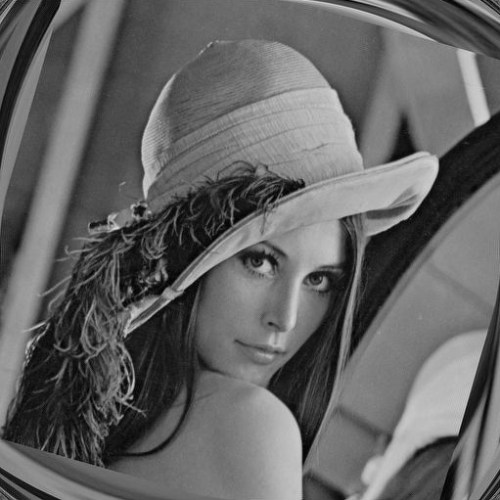

In [17]:
Image.fromarray(image)

## Алгоритм разбиения списка (одномерного массива) на заданное количество частей

In [18]:
def split_list(a: list, n: int) -> list:
    res = []
    
    for i in range(1, n + 1):
        if i == n:
            res.append(a[(i - 1) * (len(a) // n):])
        else:
            res.append(a[(i-1)*(len(a) // n) : i*(len(a) // n)])
    
    return res

In [19]:
list_to_check = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
for i in range(len(list_to_check)):
    print(f"{i}: {split_list(list_to_check, i)}")

0: []
1: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
2: [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
3: [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]
4: [[1, 2], [3, 4], [5, 6], [7, 8, 9, 10]]
5: [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
6: [[1], [2], [3], [4], [5], [6, 7, 8, 9, 10]]
7: [[1], [2], [3], [4], [5], [6], [7, 8, 9, 10]]
8: [[1], [2], [3], [4], [5], [6], [7], [8, 9, 10]]
9: [[1], [2], [3], [4], [5], [6], [7], [8], [9, 10]]


## Функция, разбивающая исходную матрицу пикселей на части по заданным размерностям n (деление по строкам) и d (деление по колонкам)

In [21]:
def split_image(n: int, d: int, image: np.ndarray) -> np.ndarray:
    """
    Функция разбиения изображения на n * d равных частей.
    :param n: коэффицент разбиения по вертикали
    :param d: коэффицент разбиения по горизонтали
    :param image: изображения в формате пиксельной таблицы
    :return: np.array
    """
    # Функция разбиения списка на n равных элементов
    def split_list(a: list, n: int) -> list:
        res = []

        for i in range(1, n + 1):
            if i == n:
                res.append(a[(i - 1) * (len(a) // n):])
            else:
                res.append(a[(i - 1) * (len(a) // n): i * (len(a) // n)])

        return res

    # разбиение списка с индексами строк на n сегментов
    rows_splitted = split_list([i for i in range(image.shape[0])], n)
    # разбиение списка с индексами колонок на d сегментов
    columns_splitted = split_list([j for j in range(image.shape[1])], d)

    res = []

    for i in rows_splitted:
        for j in columns_splitted:
            # Новый сегмент инициирован сегментом строк и сегментом столбцов вместе
            res.append([])
            for i_i in i:
                # Для каждой строки отделльный вектор с пикселями
                res[-1].append([])
                for j_j in j:
                    # Добавление пикселя в последнюю доступную ячейку
                    res[-1][-1].append(image[i_i][j_j].tolist())
    temp = res.copy()
    res = []
    for i in temp:
        res.append(np.array(i, dtype=np.uint8))

    return res

## Результат

In [22]:
count = 0
for i in split_image(3, 4, image):
    count += 1
    img = Image.fromarray(i)
    img.show()

# Отображение фрактала

## Реализация замены L-системы

In [23]:
axiom = "F"
rules = {"F": "F-F++F-F"}

In [24]:
def create_l_system(iters, axiom, rules):
    """
    Функция, реализующая построение l систем по заданым параметрам
    :param iters: чецлое число, количество итераций змаены
    :param axiom: строка, аксимома l-системы
    :param rules: словарь, правила замены l-системы
    :return: строка, iters-итерации l-системы с акcиомой axiom и правила rules
    """
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    # Поитерационное применение правил замены.
    for i in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string

In [25]:
for i in range(5):
    print(f"{i}: {create_l_system(i, axiom, rules)}")

0: F
1: F-F++F-F
2: F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F
3: F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F
4: F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F-F-F++F-F-F-F++F-F++F-F++F-F-F-F++F-F


## Реализация определения вершин фрактала через модуль turtle

In [26]:
class fractal_1:
    def __init__(self, axiom, rules, iterations, angle, distance=1):
        self.peaks = []
        self.angle = angle
        self.distance = distance
        self.l_system = create_l_system(iterations, axiom, rules)

    def draw(self, size=2, y_offset=0, x_offset=0, offset_angle=0, width=450, height=450):

        inst=self.l_system
        length=self.distance
        angle=self.angle

        
        def draw_l_system(fractal: fractal_1, t, l_system, angle, distance):
            for cmd in l_system:
                if cmd == 'F':
                    t.forward(distance)
                    fractal.peaks.append(t.pos())
                elif cmd == '+':
                    t.right(angle)
                elif cmd == '-':
                    t.left(angle)
    
        t = turtle.Turtle()
        wn = turtle.Screen()
        wn.setup(width, height)
    
        t.up()
        t.backward(-x_offset)
        t.left(90)
        t.backward(-y_offset)
        t.left(offset_angle)
        t.down()
        t.speed(0)
        t.pensize(size)
        draw_l_system(self, t, inst, angle, length)
        t.hideturtle()
        wn.exitonclick()    

In [27]:
a = fractal_1(axiom, rules, 4, 60)

In [28]:
a.draw()

2024-02-18 21:40:04.508 Python[14833:1281466] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [29]:
a.peaks

[(0.00,1.00),
 (-0.87,1.50),
 (0.00,2.00),
 (0.00,3.00),
 (-0.87,3.50),
 (-1.73,3.00),
 (-1.73,4.00),
 (-2.60,4.50),
 (-1.73,5.00),
 (-1.73,6.00),
 (-0.87,5.50),
 (0.00,6.00),
 (-0.00,7.00),
 (-0.87,7.50),
 (0.00,8.00),
 (0.00,9.00),
 (-0.87,9.50),
 (-1.73,9.00),
 (-1.73,10.00),
 (-2.60,10.50),
 (-3.46,10.00),
 (-3.46,9.00),
 (-4.33,9.50),
 (-5.20,9.00),
 (-5.20,10.00),
 (-6.06,10.50),
 (-5.20,11.00),
 (-5.20,12.00),
 (-6.06,12.50),
 (-6.93,12.00),
 (-6.93,13.00),
 (-7.79,13.50),
 (-6.93,14.00),
 (-6.93,15.00),
 (-6.06,14.50),
 (-5.20,15.00),
 (-5.20,16.00),
 (-6.06,16.50),
 (-5.20,17.00),
 (-5.20,18.00),
 (-4.33,17.50),
 (-3.46,18.00),
 (-3.46,17.00),
 (-2.60,16.50),
 (-1.73,17.00),
 (-1.73,18.00),
 (-0.87,17.50),
 (0.00,18.00),
 (0.00,19.00),
 (-0.87,19.50),
 (0.00,20.00),
 (0.00,21.00),
 (-0.87,21.50),
 (-1.73,21.00),
 (-1.73,22.00),
 (-2.60,22.50),
 (-1.73,23.00),
 (-1.73,24.00),
 (-0.87,23.50),
 (0.00,24.00),
 (0.00,25.00),
 (-0.87,25.50),
 (0.00,26.00),
 (0.00,27.00),
 (-0.87,27.

## Альтренативная реализация

In [30]:
class fractal:
    def __init__(self, axiom, rules, iterations, angle):
        """
        Инициализация класса fractal
        :param axiom: аксиома данного фрактала для построения его l-системы
        :param rules: правила замены для построения этого фрактала с ипользованием l-систем
        :param iterations: количество итераций отрисовки конректного экзепляра класса fractal
        :param angle: угол поворота между двумя линиями
        """
        self.printed = False
        self.drawed = False
        self.l_system = create_l_system(iterations, axiom, rules)
        self.current_angle = 0
        self.angle = angle

    def draw(self):
        """
        Если вершины фрактала ещё не определены (not self.drawed),
        происходит определение вершин фрактала с длиной одного звена1
        :return: None
        """
        if not self.drawed:
            self.peaks = [(0.00, 0.00)]
            # выполнение команд из self.l_system (l-системы экземпляра класса)
            for cmd in self.l_system:
                match cmd:

                    case 'F':

                        if self.current_angle <= 90 and self.current_angle >= 0:

                            new_x = self.peaks[-1][0] + abs(cos(radians(90 - self.current_angle)))
                            new_y = self.peaks[-1][1] + abs(sin(radians(90 - self.current_angle)))

                        elif self.current_angle < 0 and self.current_angle >= -90:

                            new_x = self.peaks[-1][0] - abs(cos(radians(-90 - self.current_angle)))
                            new_y = self.peaks[-1][1] + abs(sin(radians(-90 - self.current_angle)))

                        elif self.current_angle < -90 and self.current_angle >= -180:

                            new_x = self.peaks[-1][0] - abs(sin(radians(-180 - self.current_angle)))
                            new_y = self.peaks[-1][1] - abs(cos(radians(-180 - self.current_angle)))

                        elif self.current_angle <= 180 and self.current_angle > 90:

                            new_x = self.peaks[-1][0] + abs(sin(radians(180 - self.current_angle)))
                            new_y = self.peaks[-1][1] - abs(cos(radians(180 - self.current_angle)))

                        self.peaks.append((new_x, new_y))

                    case '+':
                        self.current_angle += self.angle
                        if self.current_angle > 180:
                            self.current_angle = -360 + self.current_angle

                    case '-':
                        self.current_angle -= self.angle
                        if self.current_angle < -180:
                            self.current_angle = 360 + self.current_angle
            # Вершины фрактала определены, изменение состояния флага
            self.drawed = True

    def to_print(self):
        """
        Если не выполнено преобразование вершин фрактала для отображения (not self.printed), производится такое преобразование
        :return: None
        """
        if not self.printed:
            self.printed = True
            res = []
            self.max_x = 0
            self.max_y = 0
            min_x = 0
            min_y = 0
            # Определение минимальных координат по x и y (далее они взяты за начало отсёта)
            for i in self.peaks:
                if int(round(i[0], 2) * 100) < min_x:
                    min_x = int(round(i[0], 2) * 100)
                if int(round(i[1], 2) * 100) < min_y:
                    min_y = int(round(i[1], 2) * 100)

            # Преобразование каждой из вершин
            for i in self.peaks:
                res.append((int(round(i[0], 2) * 100) - min_x, int(round(i[1], 2) * 100) - min_y))
                if int(round(i[0], 2) * 100) - min_x > self.max_x:
                    self.max_x = int(round(i[0], 2) * 100) - min_x
                if int(round(i[1], 2) * 100) - min_y > self.max_y:
                    self.max_y = int(round(i[1], 2) * 100) - min_y

            # Центрирование фрактала и добавление рамки вокруг
            self.max_x += 100
            self.max_y += 100
            self.peaks = []
            for i, j in res:
                self.peaks.append((i + 50, j + 50))

In [32]:
b = fractal(axiom, rules, 4, 60)

In [33]:
b.draw()

In [34]:
b.peaks

[(0.0, 0.0),
 (6.123233995736766e-17, 1.0),
 (-0.8660254037844386, 1.5),
 (1.1102230246251565e-16, 2.0),
 (1.7225464241988333e-16, 3.0),
 (-0.8660254037844385, 3.5),
 (-1.7320508075688772, 3.0),
 (-1.7320508075688772, 4.0),
 (-2.598076211353316, 4.5),
 (-1.7320508075688772, 5.0),
 (-1.7320508075688772, 6.0),
 (-0.8660254037844386, 5.5),
 (1.1102230246251565e-16, 6.0),
 (1.7225464241988333e-16, 7.0),
 (-0.8660254037844385, 7.5),
 (2.220446049250313e-16, 8.0),
 (2.83276944882399e-16, 9.0),
 (-0.8660254037844384, 9.5),
 (-1.732050807568877, 9.0),
 (-1.732050807568877, 10.0),
 (-2.5980762113533156, 10.5),
 (-3.4641016151377544, 10.0),
 (-3.4641016151377544, 9.0),
 (-4.330127018922193, 9.5),
 (-5.196152422706631, 9.0),
 (-5.196152422706631, 10.0),
 (-6.0621778264910695, 10.5),
 (-5.196152422706631, 11.0),
 (-5.196152422706631, 12.0),
 (-6.0621778264910695, 12.5),
 (-6.928203230275508, 12.0),
 (-6.928203230275508, 13.0),
 (-7.794228634059946, 13.5),
 (-6.928203230275508, 14.0),
 (-6.92820323

## Сравнение погрешности алтернативного алгоритма относительно первого (до двух знаков после запятой)

In [35]:
res = []
for i in a.peaks:
    res.append(i)

In [36]:
q = []
for i in b.peaks:
    q.append(i)
q.pop(0)

(0.0, 0.0)

In [37]:
for i, j in zip(q, res):
    if 0 == round(i[0] - j[0], 2) and 0 == round(i[1] - j[1], 2):
        pass
    else:
        print(False)

## Отрисовка фрактала (Снежинка Коха)

In [38]:
def plot_line(from_coordinates, to_coordinates, thickness, colour, pixels):
    """
    Заполнение пиксельной матрицы pixels отображением прямой линии между двумя коорлинатами
    :param from_coordinates: целое число, начальная координата
    :param to_coordinates: целое число, конечная координата
    :param thickness: целое число, толщина прямой линии
    :param colour: список формата [r, g, b], цвет проводимой линии
    :param pixels: np.ndarray, пиксельная матрица для заполнения
    :return: None
    """
    # Выяснение размеров пиксельной матрицы
    max_x_coordinate = len(pixels[0])
    max_y_coordinate = len(pixels)

    # Расстояние от первоначальной точки до второй по вертикали и горизонтали
    horizontal_distance = to_coordinates[1] - from_coordinates[1]
    vertical_distance = to_coordinates[0] - from_coordinates[0]

    # Вычисление расстояния между двумя заданными точками
    distance =  sqrt((to_coordinates[1] - from_coordinates[1])**2 \
                + (to_coordinates[0] - from_coordinates[0])**2)

    # Определение длины шага для итераций по вертикали и горизонтали
    horizontal_step = horizontal_distance/distance
    vertical_step = vertical_distance/distance

    # Вход в цикл для отображения, каждая итерация создаёт одну точку вдоль отображаемой прямой
    for i in range(round(distance)):

        # Две кординаты по центры рисуемой линии заданной толщины на момент i-итерации
        current_x_coordinate = round(from_coordinates[1] + (horizontal_step*i))
        current_y_coordinate = round(from_coordinates[0] + (vertical_step*i))

        # Отрисовка пикселей вокруг точки (current_x_coordinate, current_y_coordinate) для создания толщины
        for x in range (-thickness, thickness):
            for y in range (-thickness, thickness):
                x_value = current_x_coordinate + x
                y_value = current_y_coordinate + y

                if x_value > 0 and x_value < max_x_coordinate and y_value > 0 and y_value < max_y_coordinate:
                    pixels[y_value][x_value] = colour

In [39]:
b.to_print()

In [40]:
b.peaks

[(2388, 50),
 (2388, 150),
 (2301, 200),
 (2388, 250),
 (2388, 350),
 (2301, 400),
 (2215, 350),
 (2215, 450),
 (2128, 500),
 (2215, 550),
 (2215, 650),
 (2301, 600),
 (2388, 650),
 (2388, 750),
 (2301, 800),
 (2388, 850),
 (2388, 950),
 (2301, 1000),
 (2215, 950),
 (2215, 1050),
 (2128, 1100),
 (2042, 1050),
 (2042, 950),
 (1955, 1000),
 (1868, 950),
 (1868, 1050),
 (1782, 1100),
 (1868, 1150),
 (1868, 1250),
 (1782, 1300),
 (1695, 1250),
 (1695, 1350),
 (1609, 1400),
 (1695, 1450),
 (1695, 1550),
 (1782, 1500),
 (1868, 1550),
 (1868, 1650),
 (1782, 1700),
 (1868, 1750),
 (1868, 1850),
 (1955, 1800),
 (2042, 1850),
 (2042, 1750),
 (2128, 1700),
 (2215, 1750),
 (2215, 1850),
 (2301, 1800),
 (2388, 1850),
 (2388, 1950),
 (2301, 2000),
 (2388, 2050),
 (2388, 2150),
 (2301, 2200),
 (2215, 2150),
 (2215, 2250),
 (2128, 2300),
 (2215, 2350),
 (2215, 2450),
 (2301, 2400),
 (2388, 2450),
 (2388, 2550),
 (2301, 2600),
 (2388, 2650),
 (2388, 2750),
 (2301, 2800),
 (2215, 2750),
 (2215, 2850),
 

In [41]:
def draw_fractal(axiom, rules, iters, angle, thickness):
    """
    Отрисовка фрактала
    :param axiom: Аксиома l-системы данного фрактала
    :param rules: Правила замены l-системы данного фрактала
    :param iters: Количество итераций отображения фрактала
    :param angle: Угол, использованный при поворотах в отображении фрактала
    :param thickness: толщина отображения фрактала
    :return: Image
    """
    # Инициализация фрактала и применение методов draw() и to_print()
    b = fractal(axiom, rules, iters, angle)
    b.draw()
    b.to_print()

    # Определение пиксельной матрицы
    pixels = np.zeros((b.max_x, b.max_y, 3), dtype=np.uint8)

    # Отображение прямой между двумя соседними вершинами фарктала, записанными в b.peaks
    for i in range(1, len(b.peaks)):
        plot_line(b.peaks[i - 1], b.peaks[i], thickness, [255, 200, 0], pixels)

    img = Image.fromarray(pixels)
    return img

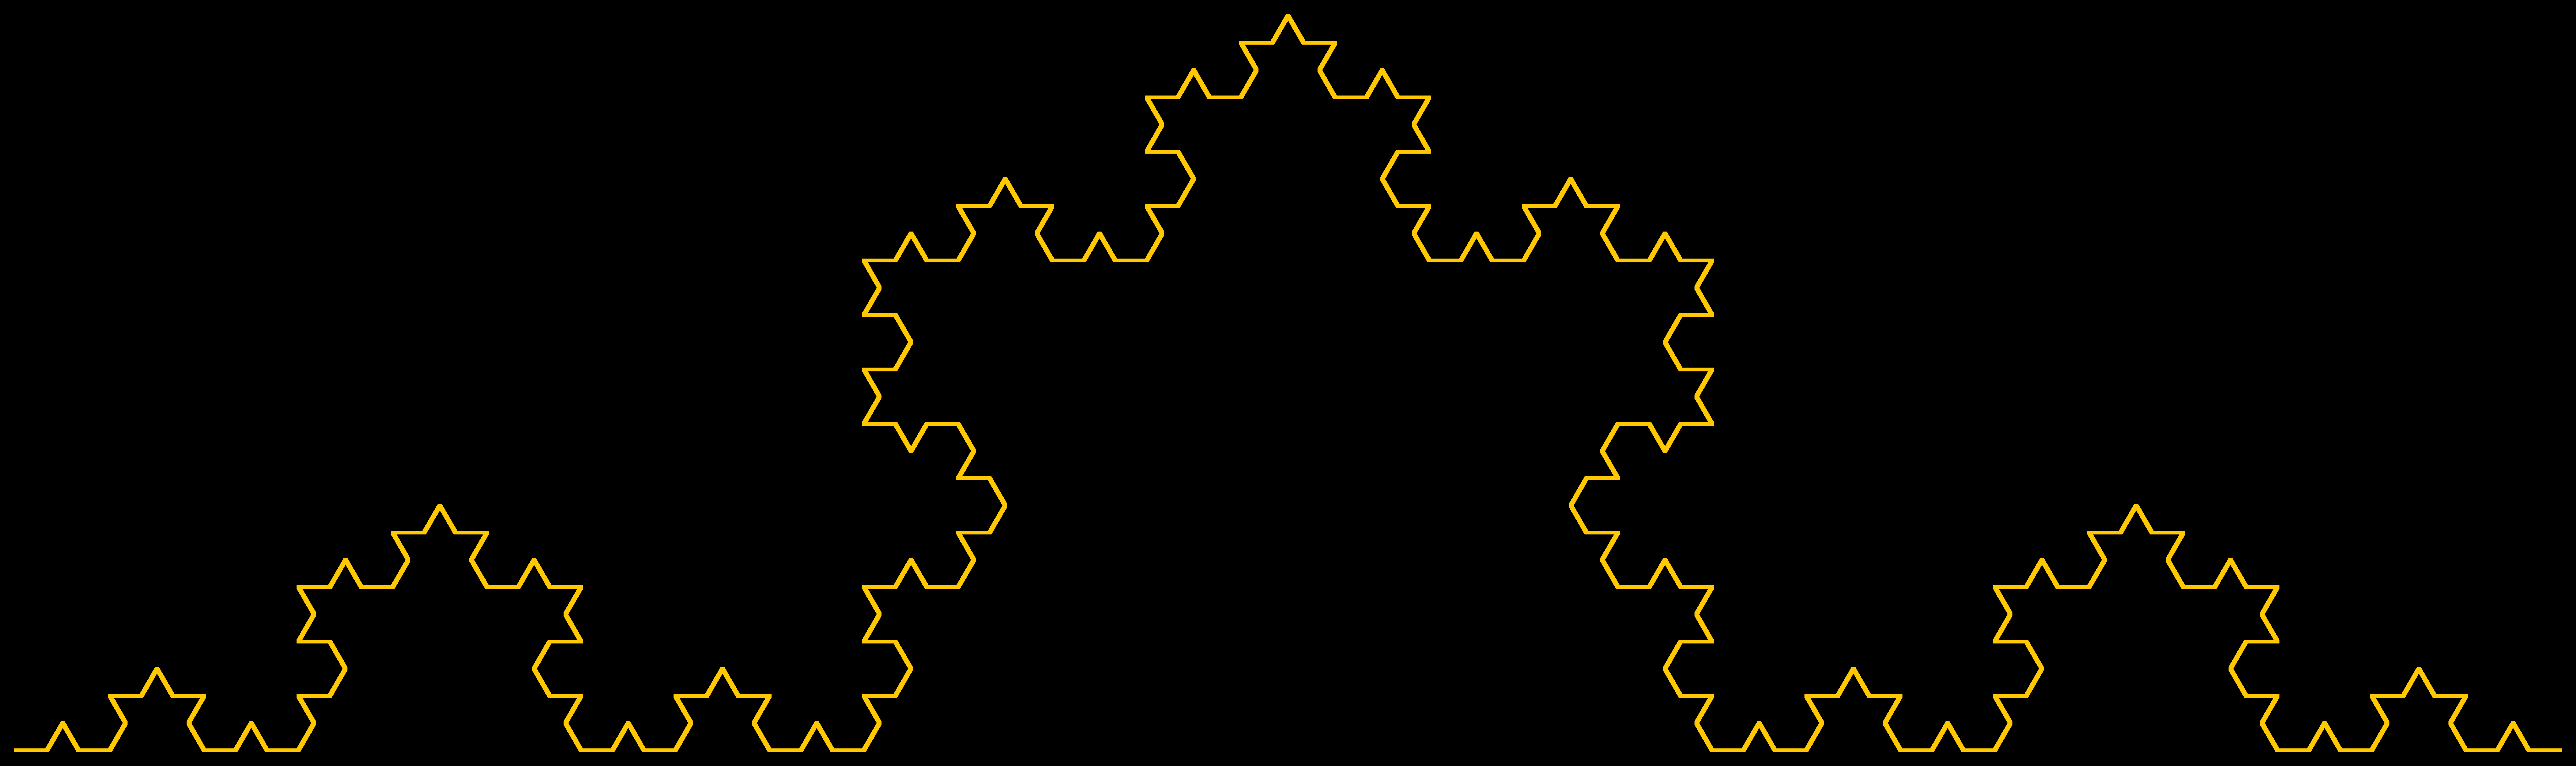

In [42]:
draw_fractal(axiom, rules, 4, 60, 6)

# Реализация фрактального метода перестановки

In [43]:
number_of_peaks = lambda iterations: 4 ** iterations + 1

In [45]:
# Проверка гипотезы о том, что у кривой Коха 4 ** power + 1 вершин
for i in range(7):
    koch_line = fractal(axiom, rules, i, 60)
    koch_line.draw()
    if len(koch_line.peaks) != number_of_peaks(i):
        print(False)
        break
else:
    print(True)

True


In [46]:
text = "Компьютер не отвечает. Я еще несколько раз поднимаю руки, шевелю пальцами ног. Определенно намечается прогресс. И вот я уже раскачиваю стопы вперед-назад. Получается! Сгибаю колени. Ноги у меня тоже вполне спортивные. Конечно, не такие перекачанные, как у бодибилдеров, но явно слишком крепкие для человека на грани смерти. Впрочем, я не знаю, какими они должны быть в идеале. Уперев ладони в кровать, отталкиваюсь. Корпус приподнимается. Я практически сажусь! Это стоит мне неимоверных усилий, но я не сдаюсь. От моих движений кровать слегка покачивается. Это, безусловно, не простая кровать. Приподняв голову чуть повыше, замечаю, что в изголовье и изножье овальной кровати вмонтированы мощные стенные кронштейны. То есть это некое подобие жесткого гамака. Странно… Вскоре я сижу на шланге, который воткнут в мой зад. Ощущение не самое приятное, но как оно вообще может быть приятным, если у вас там трубка? Теперь мне гораздо лучше видно все вокруг. Это не обычная палата в больнице. Стены из пластика, а сама комната круглая. Из светодиодных ламп, встроенных в потолок, льются ослепительно-белые лучи."

In [47]:
text

'Компьютер не отвечает. Я еще несколько раз поднимаю руки, шевелю пальцами ног. Определенно намечается прогресс. И вот я уже раскачиваю стопы вперед-назад. Получается! Сгибаю колени. Ноги у меня тоже вполне спортивные. Конечно, не такие перекачанные, как у бодибилдеров, но явно слишком крепкие для человека на грани смерти. Впрочем, я не знаю, какими они должны быть в идеале. Уперев ладони в кровать, отталкиваюсь. Корпус приподнимается. Я практически сажусь! Это стоит мне неимоверных усилий, но я не сдаюсь. От моих движений кровать слегка покачивается. Это, безусловно, не простая кровать. Приподняв голову чуть повыше, замечаю, что в изголовье и изножье овальной кровати вмонтированы мощные стенные кронштейны. То есть это некое подобие жесткого гамака. Странно… Вскоре я сижу на шланге, который воткнут в мой зад. Ощущение не самое приятное, но как оно вообще может быть приятным, если у вас там трубка? Теперь мне гораздо лучше видно все вокруг. Это не обычная палата в больнице. Стены из пла

In [48]:
len(text)

1105

In [49]:
power_for_fractale = lambda text: int(log(len(text) - 1, 4) + 1)

In [50]:
power_for_fractale(text)

6

In [51]:
number_of_peaks(power_for_fractale(text))

4097

In [52]:
def peaks_comparement(pair):
    return pair[0][1]

In [56]:
def peak_shuffle(initial_data):
    power = 3
    text = initial_data
    # инициализация фрактала
    a = fractal(axiom="F", rules={"F": "F-F++F-F"}, iterations=power_for_fractale(text), angle=60)
    a.draw()
    # запоминание вершин фрактала
    a = a.peaks
    avg = int((len(a) - len(a) % 2) / 2)
    
    # Цикл перемешки   
    while power <= len(text):
        text_splitted = split_string(text, power)
        peaks_for_shuffle = [a[i] for i in range(avg - (power - 1) // 2, avg + (power - 1) // 2 + 1)]

        # Использование симметричности фрактала для перемешки
        res = list(zip(peaks_for_shuffle, text_splitted))
        res.sort(key=peaks_comparement, reverse=True)
        text = ""
        
        for i in res:
            text += i[1]
        power += 2
    return text

In [57]:
%timeit peak_shuffle(text)

96.6 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
peak_shuffle(text)

'в со  ионаиилне,в ьнра г!,пЯНене.ку члвен,ерсднеоа ь сн ерпаее е кионркб  .иВ еанс бп-ьевн.нишге-е тетмиеплтауооылки.отуй че,одвтнакопкеь,ятПу  ,Кн  то. Эее дрцгпнидееоск а е т лнпписулыоку рьн рнатмлтнатамаипаебынст туоиы л иоосима иеярюрщсоекияустсксзо Ворщвт совючткажаУ,  рнсясыедвкаоосгплчн  ш тю   щкПекнкитсио св рСОл расдсввонкпеьо т иеаа в.рнак нае впеаыпдиччу ,меЯ,тмта.ичада.  т еоояокгйсл еокекреикт  кп в,б мнел мву. Ояеоа еп янте енппн,а  своне  амзбаедн т  еаы юхое еоылтулвкаьятыкпнииг , оонрг еьмзоевнто  ы коКдев.е ушаанав оиусиаг тшем ирдлм лзубанн еояедпо июкелшок тисыс  еркроеж внТ иаовлвеыройчоаама .ьь оржатт нтсн бт.яу?Э карТ ипнр жаобюнвтин дрхСертсрхое мяслтп окч,киаю пм и   аоруиеачоомсптаыИа ч че мто.янкрм еннгоарьчбжрдто сс адн йолрс  оиетп  ть,ыооеечел з.но инОвлекоьотв  е ч  .оужйнвлаиврры ит  н  м ен няощойндро пК т гролве иловнеэ. о,нви рЭльб н ,ма ыанхслмтб о иооовк ео…еавделе,туло сл овас юьди.боиняпевора оизявержд цушо  иттСоньтлие.згкеитеьмеьыикт и аоз сщ

In [59]:
%timeit peak_shuffle(text2)

678 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [60]:
peak_shuffle(text2)

' озн ан ео.мииитронсс ужмсчеынгт ,вычоЯ от.вонгиооия Х нн  ваеа о  ечмьвеиДбж? кыл  жаьоятте'

# Отрисовка сетки для реализации итогого алгоритма фрактальное перемешки.

In [61]:
def draw_grid(axiom, rules, iters, angle, thickness):
    """
    Отрисовка сетки фрактала
    :param axiom: Аксиома l-системы данного фрактала
    :param rules: Правила замены l-системы данного фрактала
    :param iters: Количество итераций отображения фрактала
    :param angle: Угол, использованный при поворотах в отображении фрактала
    :param thickness: толщина отображения фрактала
    :return: Image
    """
    # Инициализация фрактала и применение методов draw() и to_print()
    b = fractal(axiom, rules, iters, angle)
    b.draw()
    b.to_print()

    # Инициализация пиксельной матрицы
    pixels = np.zeros((b.max_x, b.max_y, 3), dtype=np.uint8)
    LENGHT = abs(b.peaks[(len(b.peaks) - 1) // 2 - 1][1] - b.peaks[(len(b.peaks) - 1) // 2 + 1][1])
    HEIGHT = len(pixels) - 100
    X_DIFF = int(HEIGHT / tan(radians(60)))

    # Отображение горизонтальных линий сетки
    for i in range((len(b.peaks) - 1) // 2 + 1):
        plot_line((b.peaks[(len(b.peaks) - 1) // 2 - i][0], 0),
                  (b.peaks[(len(b.peaks) - 1) // 2 + i][0], len(pixels[0]) - 1), thickness // 2, [255, 200, 0], pixels)

    # Отображение негоризонатльных линий сетки, направленных вправо
    for i in range(50, len(pixels[0]) - 99, LENGHT):
        plot_line((len(pixels) - 50, i), (len(pixels) - 50 - HEIGHT, i + X_DIFF), thickness // 2, [255, 200, 0], pixels)

    # Отображение негоризонатльных линий сетки, направленных влево
    for i in range(len(pixels[0]) - 50, 49, -LENGHT):
        plot_line((len(pixels) - 50, i), (len(pixels) - 50 - HEIGHT, i - X_DIFF), thickness // 2, [255, 200, 0], pixels)

    # Отображение фрактала поверх сетки
    for i in range(1, len(b.peaks)):
        plot_line(b.peaks[i - 1], b.peaks[i], thickness, [248, 0, 0], pixels)


    img = Image.fromarray(pixels)
    return img

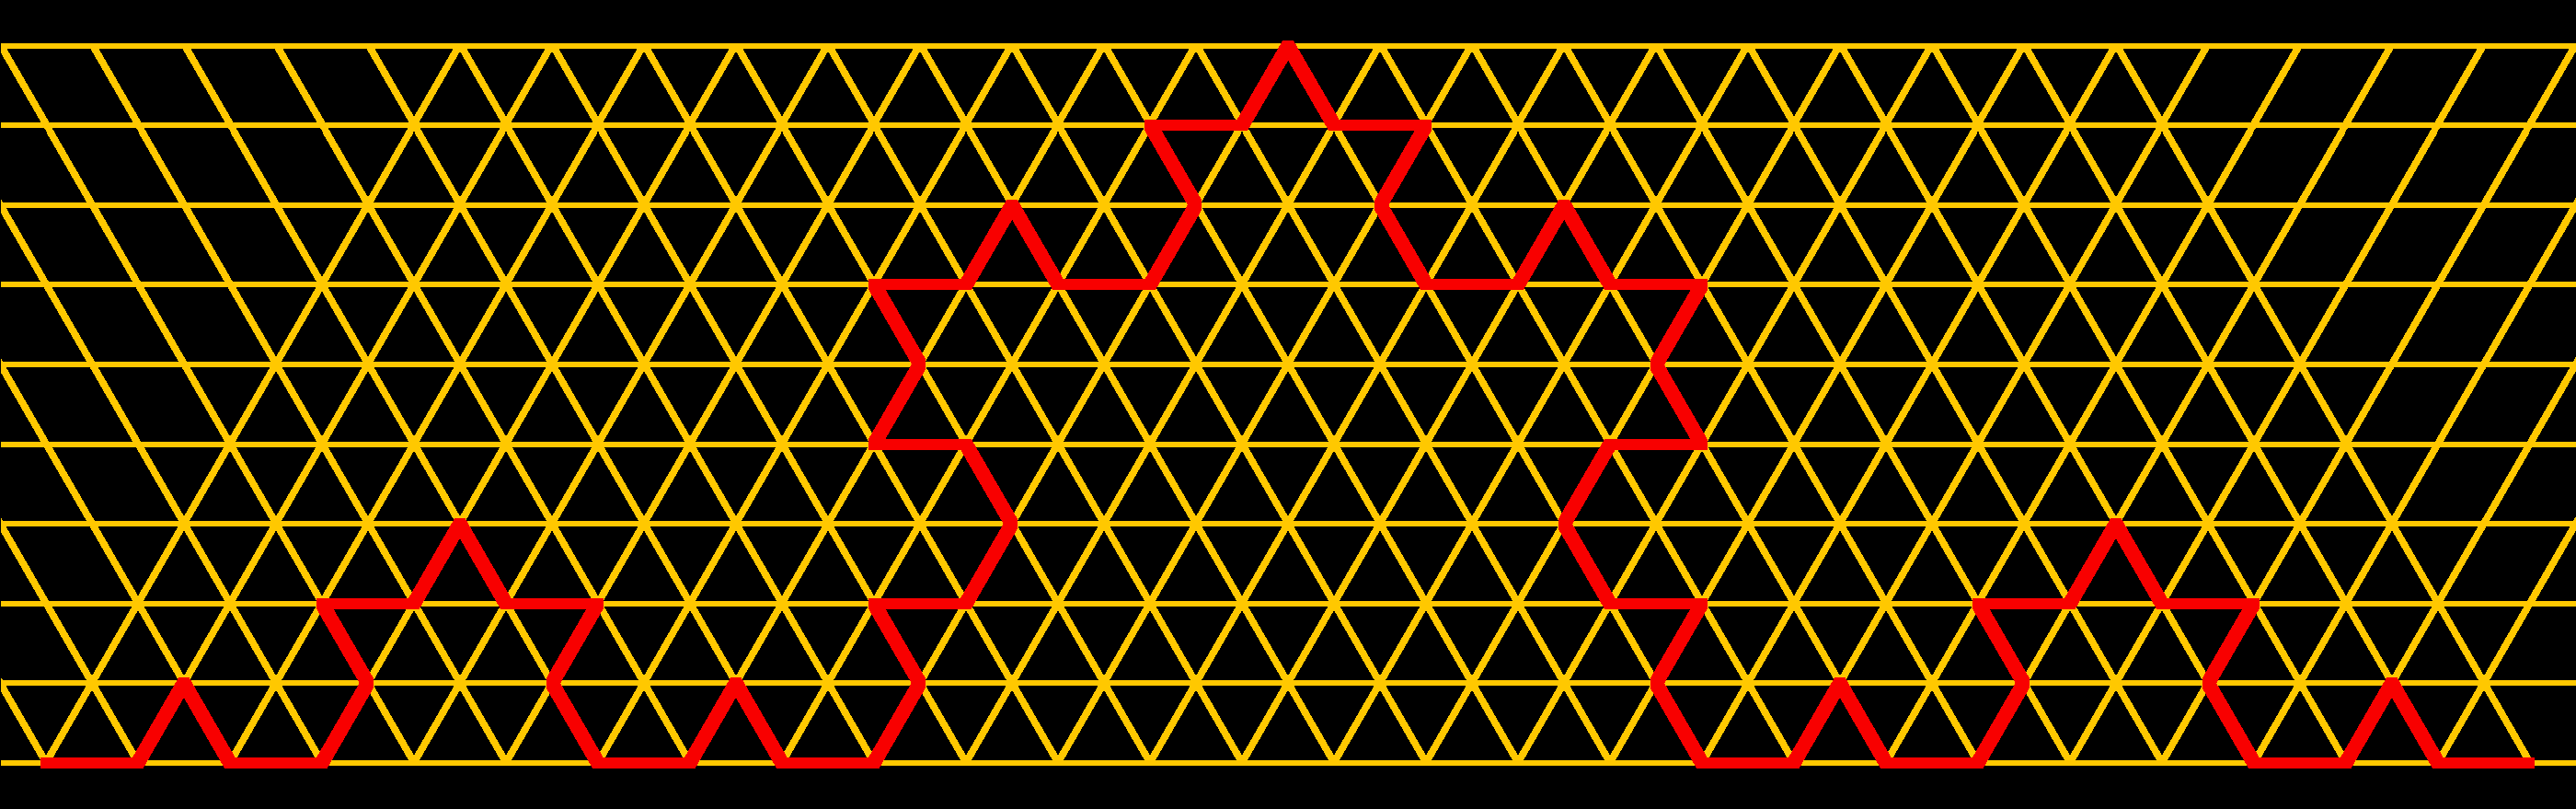

In [62]:
draw_grid(axiom, rules, 3, 60, 6)

# Работа с маршрутами

In [63]:
# Список смежности, репрезентующий граф связи вершин
GRAPH=[
    [1, 2, 3, 4, 5],
    [0, 2, 3, 6, 7],
    [0, 1, 3, 4, 6, 7, 8, 9],
    [0, 1, 2, 4, 5, 7, 8, 9],
    [0, 2, 3, 5, 7, 8, 9, 10],
    [0, 3, 4, 9, 10],
    [1, 2, 7, 8],
    [1, 2, 3, 4, 6, 8, 9],
    [2, 3, 4, 6, 7, 9, 10],
    [2, 3, 4, 5, 7, 8, 10],
    [4, 5, 8, 9]
]

In [64]:
def find_ways(graph=GRAPH):
    """
    Функция поиска всевозможных путей в графе
    :param graph: list, список смежности, репрезентирующий граф связи между сегментами сетки
    :return: list, список всевозможных путей полного обхода
    """
    # Список взевозможных путей
    all_ways = []

    # Генератор путей длины len(graph) с началом в вершине start и концом в вершине goal (полный обход по графу).
    def dfs_paths(graph, start, goal):
        stack = [(start, [start])]
        while stack:
            (vertex, path) = stack.pop()
            for next in set(graph[vertex]) - set(path):
                if next == goal:
                    if len(path + [next]) == len(graph): yield path + [next]
                else:
                    stack.append((next, path + [next]))

    # Поиск путей длины 11 между каждыми двумя сегментами сетки
    for i in range(len(graph)):
        for j in range(len(graph)):
            all_ways += list(dfs_paths(graph, i, j))

    return all_ways

In [65]:
print(len(find_ways()))

168432


# Реализация алгоритма фрактальной перемешки

## Итоговый алгоритм перемешки текста

In [66]:
def text_shuffle(initial_data, graph=GRAPH):
    """
    Функция, реализующая маршрутную перестановку данного текста по описанному алгоритму (для второй итерации кривой Коха).
    :param initial_data: str, изначальная строка.
    :param graph: list, список смежности, репрезентирующий граф связи сегментов фрактальной сетки.
    :return: str, перемешанная строка.
    """
    # Определение типа данных и соответсвующего ему вида разбюиения
    data = split_string(initial_data, 11)
    # Выбор одного из путей в графе.
    way = choice(find_ways(graph))
    # Перемешка
    res = [data[i] for i in way]

    return "".join(res)

In [67]:
%timeit text_shuffle(text1)

1.34 s ± 8.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
text_shuffle(text1)

' воткнут в мой зад. Ощущение не самое приятное, но как оно вообще может быть приятным, если у вас таные кронштейны. То есть это некое подобие жесткого гамака. Странно… Вскоре я сижу на шланге, которыйм трубка? Теперь мне гораздо лучше видно все вокруг. Это не обычная палата в больнице. Стены из пласполне спортивные. Конечно, не такие перекачанные, как у бодибилдеров, но явно слишком крепкие для ченяв голову чуть повыше, замечаю, что в изголовье и изножье овальной кровати вмонтированы мощные стеня прогресс. И вот я уже раскачиваю стопы вперед-назад. Получается! Сгибаю колени. Ноги у меня тоже вКомпьютер не отвечает. Я еще несколько раз поднимаю руки, шевелю пальцами ног. Определенно намечаетсловека на грани смерти. Впрочем, я не знаю, какими они должны быть в идеале. Уперев ладони в кровать, отталкиваюсь. Корпус приподнимается. Я практически сажусь! Это стоит мне неимоверных усилий, но я тика, а сама комната круглая. Из светодиодных ламп, встроенных в потолок, льются ослепительно-белые

In [69]:
%timeit text_shuffle(text2)

1.37 s ± 9.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
text_shuffle(text2)

'его не вижу.граничены. Я ничХотел бысти мои  такое? Да что жить, но возможно я выяснвесьма о'

## Итоговый алгоритм перемешки изображения

In [71]:
def picture_shuffle(initial_data, graph=GRAPH):
    """
    Функция, реализующая маршрутную перестановку данной картинки по описанному алгоритму (для второй итерации кривой Коха).
    :param initial_data: np.array, изначальная картинка.
    :param graph: list, список смежности, репрезентирующий граф связи сегментов фрактальной сетки.
    :return: PIL.Image.Image, Перемешанная картинка.
    """
    # Разбиение картинки на части
    data = split_image(3, 4, initial_data)
    # Выбор одного из путей в графе.
    way = choice(find_ways(graph))
    # Перемешка изображения
    res = [data[i] for i in way] + [data[-1]]
    image = []
    # Сохранение сегментированных изображений
    for i in range(len(res)):
        image.append(Image.fromarray(res[i]))

    HEIGHT = max(image, key=lambda x: x.size[0]).size[0]
    WIDHT = max(image, key=lambda x: x.size[1]).size[1]
    new_imgs = []

    # Объединение изображений по горизонтали
    for i in range(1, 4):
        new_imgs.append(Image.new("RGB", (4 * HEIGHT, WIDHT), (250, 250, 250)))
        temp = image[(i - 1) * 4 : i * 4]
        for j in range(len(temp)):
            new_imgs[-1].paste(temp[j], (HEIGHT * j, 0))
        new_imgs[-1].save(f"{i}.png")

    # Объединение изображений по вертикали
    new_img = Image.new("RGB", (4 * HEIGHT, 3 * WIDHT), (250, 250, 250))
    for i in range(len(new_imgs)):
        new_img.paste(new_imgs[i], (0, i * WIDHT))

    return new_img

In [72]:
%timeit picture_shuffle(image)

1.46 s ± 8.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


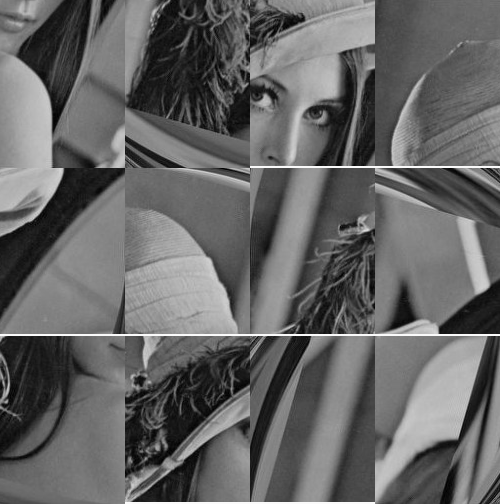

In [73]:
picture_shuffle(image)